# Project: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab/Python_Project/foodhub_order.csv')
# returns the first 5 rows
df.head()
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

#### How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

# there are 1898 rows and 9 columns

(1898, 9)

#### Observations:


*   There are 1898 records in the dataframe
*   There are 9 columns in the dataframe



#### What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   The dataframe doesnt contain any null values in any of the Series
*   food_preparation_time and delivery_time are time mentioned in minutes
*   order_id and customer_id are identity columns and are not required to be included in the statistical analysis
*   cost_of_the_order is the cost incurred by the customer for the order





#### Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here

# There are no null values in the data frame
df.isna().sum()
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


*   There are no null values in any of the series in the dataframe
*   All the series in the dataframe have equal count of records



####  Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe().T.loc[['food_preparation_time']]

,count,mean,std,min,25%,50%,75%,max
food_preparation_time,1898.0,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0


#### Observations:


*   The minimum food preparation time is 20 mins and maximum is 35 mins.
*   The average being 27 minutes
*   As the mean is near to the median, the data is having normal distribution
*   There are no outliers in food preparation time series





####  How many orders are not rated?

In [ ]:
# Write the code here

# there are 736 orders which are not rated
df[df['rating']=='Not given']['order_id'].count()

736

#### Observations:

*   Orders which are not rated are denoted by 'Not given' in the rating column.
*   There are 736 orders which are not rated.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

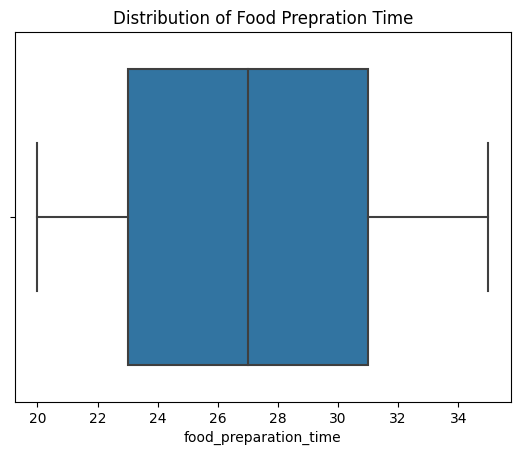

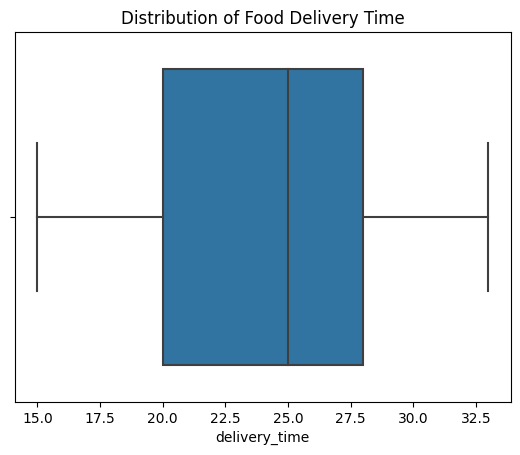

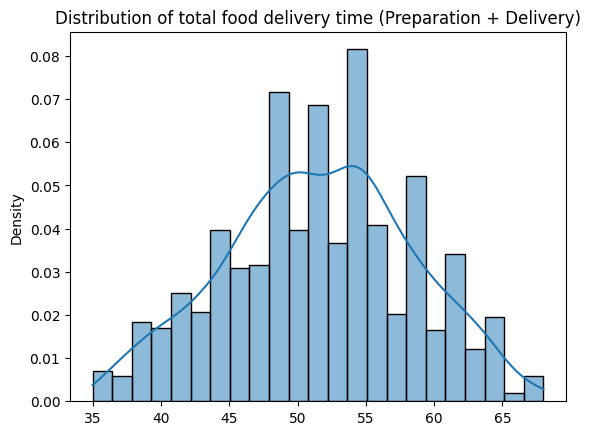

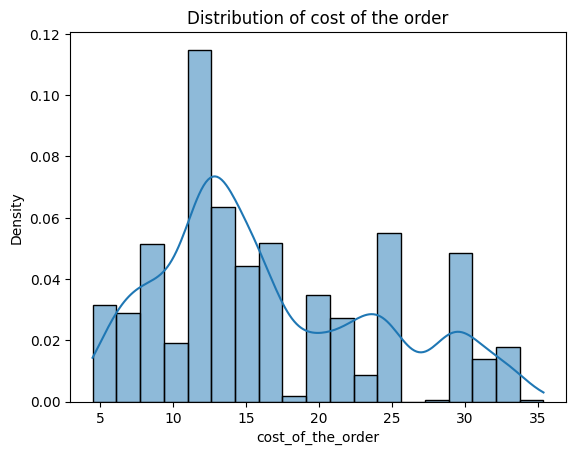

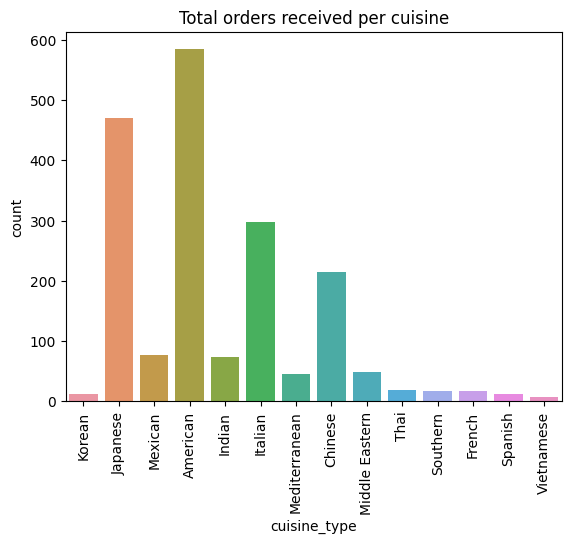

In [ ]:
from matplotlib import pyplot as plt

# Distirbution of food preparation time
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Distribution of Food Prepration Time')
plt.show()

# Distirbution of food delivery time
sns.boxplot(data=df, x='delivery_time')
plt.title('Distribution of Food Delivery Time')
plt.show()

# Distirbution of delivery time and food delivery time
sns.histplot(data=df,x=df['delivery_time'] + df['food_preparation_time'],stat='density',kde=True)
plt.title('Distribution of total food delivery time (Preparation + Delivery)')
plt.show()

# Distirbution of cost of the order
sns.histplot(data=df,x='cost_of_the_order',stat='density',kde=True)
plt.title('Distribution of cost of the order')
plt.show()

# number of orders per cuisine type
sns.countplot(data=df,x='cuisine_type')
plt.title('Total orders received per cuisine')
plt.xticks(rotation=90)
plt.show()

#### Observations

*   The food preparation time spans between 20 and 35 mins and the delivery time spans between 15 to 33 minutes
*   On an average, the food reaches a customer after order placed is around 52 minutes
*   American cuisine is the most popular among the customers with 550+ orders, followed by Japanese with 450+ orders. The next highest being Italian and Chinese. The most un-popular cuisine are Vietnamese and Korean.




#### Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df.groupby(['restaurant_name'])['order_id'].count().reset_index(name='orders').sort_values(by=['orders'], ascending=False)[0:5]

,restaurant_name,orders
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:

*   Based on the orders received, "Shake Shack" restaurant gets the highest number of orders with 219, followed by The "The Meatball Shop" with 132.
*   The other 3 places in top 5 restaurants in terms of order goes to "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken" and "Parm" with 3rd, 4rd and 5th place respectively.



#### Which is the most popular cuisine on weekends?

In [ ]:
df[df['day_of_the_week']=='Weekend'].groupby(['cuisine_type'])['order_id'].count().reset_index(name='orders').sort_values(by=['orders'], ascending=False)[0:1]


,cuisine_type,orders
0,American,415


#### Observations:

American cuisine is the most popular over the weenend

#### What percentage of the orders cost more than 20 dollars?

In [ ]:
((df[df['cost_of_the_order'] > 20].count() / df.count()) * 100)[0:1]

order_id    29.241307
dtype: float64

#### Observations:

29.2% of orders have the cost more than $20

#### What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

24 minutes is the mean order delivery time

#### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [ ]:
df.groupby(['customer_id'])['order_id'].count().reset_index(name='orders').sort_values(by=['orders'], ascending=False)[0:3]

# top 3 frequent customers and the number of orders they placed

,customer_id,orders
116,52832,13
84,47440,10
333,83287,9


#### Observations:

*   The top 3 most frequent customers are listed.
*   As they show patronage towards using the food hub app, the company can provide the 20% discount to the above customers.



### Multivariate Analysis

#### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


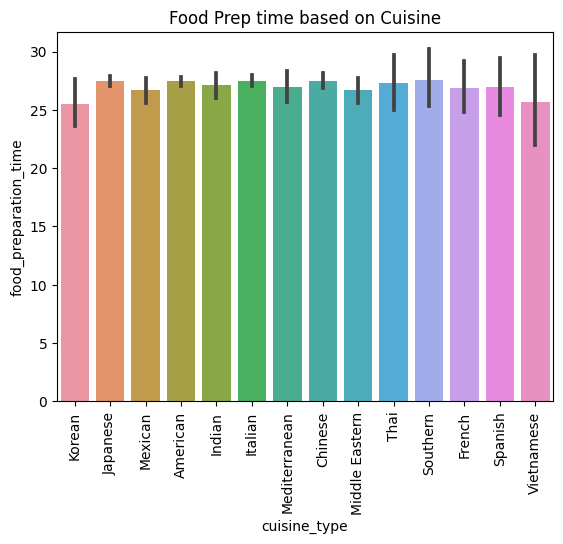

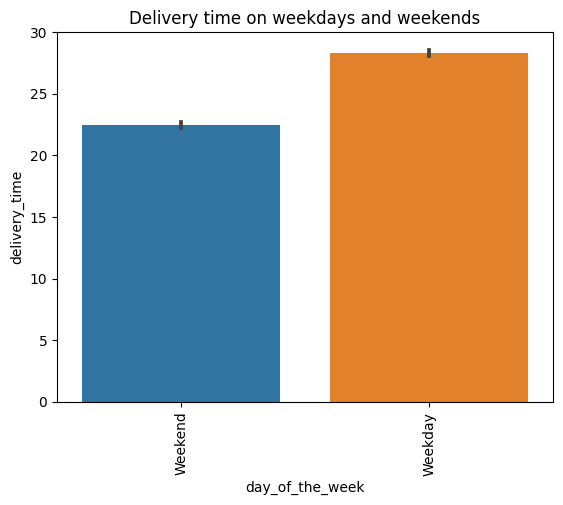

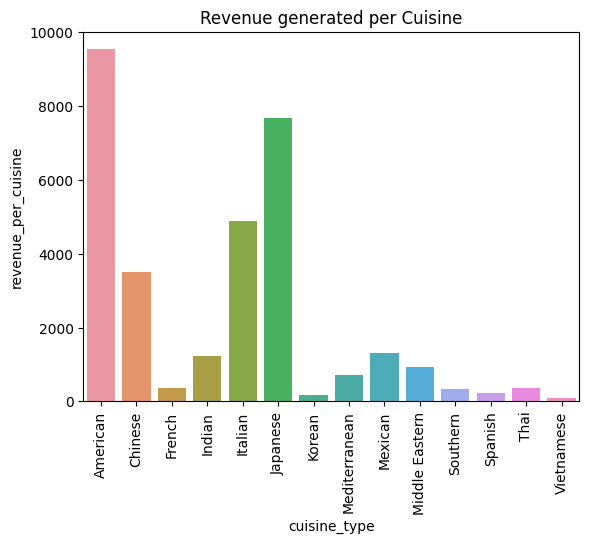

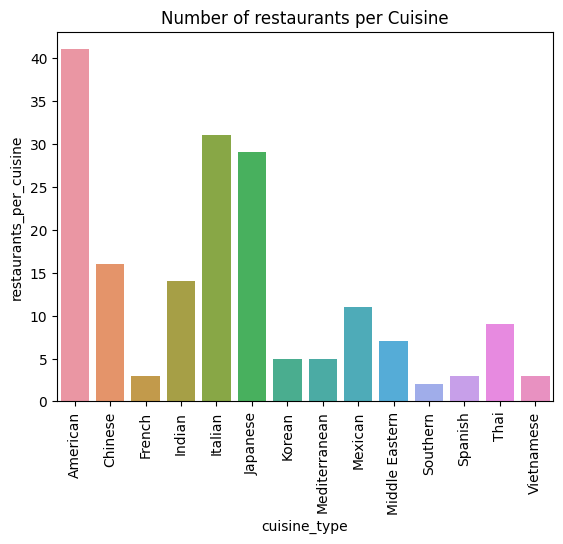

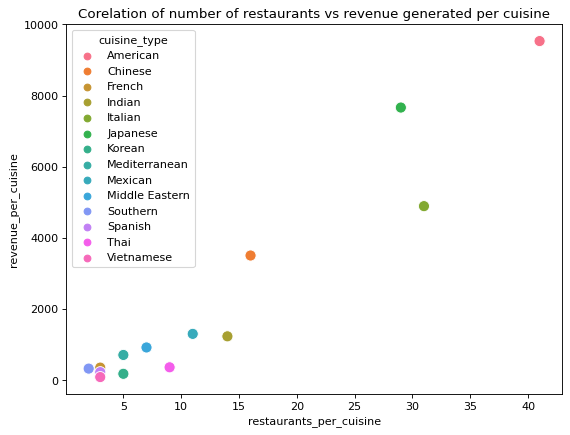

In [ ]:
# Write the code here

# cusine vs cost of the order (box plot)

# Average food preparation time for each cuisine type
sns.barplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Food Prep time based on Cuisine')
plt.xticks(rotation=90)
plt.show()

# delivery time based on the day of the order
sns.barplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery time on weekdays and weekends')
plt.xticks(rotation=90)
plt.show()

# create dataset for revenue generated per cuisine
df_revenue_per_cuisine = df.groupby(['cuisine_type'])['cost_of_the_order'].sum().reset_index(name='revenue_per_cuisine')
sns.barplot(data=df_revenue_per_cuisine, x='cuisine_type', y='revenue_per_cuisine')
plt.title('Revenue generated per Cuisine')
plt.xticks(rotation=90)
plt.show()

# get the number of restaurants for a cuisine type
df_cuisine_restaurant = df.loc[:,['cuisine_type','restaurant_name']].drop_duplicates().groupby(['cuisine_type'])['restaurant_name'].count().reset_index(name='restaurants_per_cuisine')
plt.title('Number of restaurants per Cuisine')
sns.barplot(data=df_cuisine_restaurant, x='cuisine_type', y='restaurants_per_cuisine')
plt.xticks(rotation=90)
plt.show()

# merge the revenue and restaurants count and generate a scattered plot
df_linear_corel = pd.merge(left=df_revenue_per_cuisine, right=df_cuisine_restaurant, on='cuisine_type', how='inner')
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=df_linear_corel, x='restaurants_per_cuisine', y='revenue_per_cuisine', hue='cuisine_type', s=100)
plt.title('Corelation of number of restaurants vs revenue generated per cuisine')
plt.show()

#### Observations

*   Not much of difference is noted in the preparation of food for any cuisine for that matter. All cuisines prepation times on an average ranges between 25 and 28
*   On an average the food delivery time on weekdays is greater than food delivery times during weekends. This could be primarily because of the weekday traffic.
*   No of restaurants per cuisine is high for American, followed by Japanese, Italian and Chinese.
*   As the restaurants increase the revenue also increases subsequently.However, Italian restaurants are high in number, but their revenue is less than Japanese, who has almost similar number of restaurants. This pattern shows there is less patronage for Italian cuisine. Same pattern can be found with Mexican and Indian









#### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [ ]:
# Write the code here
pd.options.mode.chained_assignment = None
def getCuisineType(restaurantName):
  cuisine_type = df.loc[df['restaurant_name'] == restaurantName, 'cuisine_type'].iloc[0]
  return cuisine_type

# filter the dataframe, remove all the 'Not given' ratings
df_ratings =  df[df['rating'] != 'Not given']

# convert the rating column to int to perform a mean
df_ratings['rating'] = df_ratings['rating'].astype(int)

# count the number of rating and average ratings
df_ratings_cnt = df_ratings.groupby(['restaurant_name'])['rating'].count().reset_index(name='rating_count')
df_ratings_avg = df_ratings.groupby(['restaurant_name'])['rating'].mean().reset_index(name='rating_average')

# merge both count and average ratings data frame by restaurant name
df_ratings_rest = pd.merge(df_ratings_cnt, df_ratings_avg, how="inner", on='restaurant_name')

# perform conditional filter to fetch the restaurants
df_ratings_rest = df_ratings_rest[(df_ratings_rest['rating_count'] > 50) & (df_ratings_rest['rating_average'] > 4)]

# Add the cuisine type as well for the restaurant for more insights
df_ratings_rest['cuisine_type'] =  df_ratings_rest['restaurant_name'].apply(getCuisineType)

# List of restaurants that are eligible to get the promotional offer
df_ratings_rest


,restaurant_name,rating_count,rating_average,cuisine_type
16,Blue Ribbon Fried Chicken,64,4.328125,American
17,Blue Ribbon Sushi,73,4.219178,Japanese
117,Shake Shack,133,4.278195,American
132,The Meatball Shop,84,4.511905,Italian


#### Observations:

*   There are very few restaurants who are popular and  rating is more than 4.
*   There are 2 American, a Japanese and a Italian restaurants who are placed in top 4 retaurants.



#### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [ ]:
# Write the code here

# method to determine the commission charged for each order by the company
def revenue(cost):
  if cost > 20:
    return cost * (25/100)
  elif cost > 5:
    return cost * (15/100)
  else:
    return 0

# apply the revenue calculation to the dataframe
df['revenue'] = df['cost_of_the_order'].apply(revenue)

# sum the revenue generated across all the orders to determine net revenue
df['revenue'].sum()

6166.303

#### Observations:

*   The net revenue generated out of the food orders is 6166.3




#### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [ ]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_total_time = df[df['total_time'] > 60]

# calculating the % of orders taking more than 60 mins to prepare & deliver
pcnt_orders_take_gt_60 = df_total_time['order_id'].count() / df['order_id'].count() * 100

# rounding to 2 decimals for easy readability
np.around(pcnt_orders_take_gt_60, decimals=2)


10.54

#### Observations:

*   Around 10.54 orders take more than 60 minutes to deliver.




#### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [ ]:
# Write the code here

# dataframe for weekday
df_weekdays = df[df['day_of_the_week'] == 'Weekday']

# dataframe for weekend
df_weekends = df[df['day_of_the_week'] == 'Weekend']

# get mean delivery time for weekday and weekend
mean_del_time_wkday = df_weekdays['delivery_time'].mean()
mean_del_time_wkend = df_weekends['delivery_time'].mean()

# print the mean delivery time
print(np.around(mean_del_time_wkday, decimals=0))
print(np.around(mean_del_time_wkend, decimals=0))

28.0
22.0


#### Observations:
The average delivery time on a weekday is high compared to average delivery time on a weekend, this might be due to office traffic which is considerably high during the weekdays.

### Conclusion and Recommendations

#### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

## Conclusions:

#### Cuisine
*   American cuisine is the most popular among the customers with 550+ orders, followed by Japanese with 450+ orders. The next highest being Italian and Chinese. The most un-popular cuisine are Vietnamese and Korean. American cuisine is the most popular over the weeknend as well.
*   No of restaurants per cuisine is high for American, followed by Japanese, Italian and Chinese.

#### Restaurants
*   As the restaurants increase the revenue also increases subsequently. Howeveer there few cuisines, where restaurants are little high, but revenue remains the same. In the case of Indian vs Mexican, Indian restaurants are more in number than Mexican, however, Mexican restaurants generate more revenue. The same comparison is true for Thai and Middle Eastern cuisine restaurants
*   There are very few restaurants who are popular and  rating is more than 4.
*   There are 2 American, a Japanese and a Italian restaurants who are placed in top 4 retaurants, which has number of ratings greater than 50 and rated more than 4 on an average  

#### Time
*   On an average, the food reaches a customer after order placed is around 52 minutes
*   Not much of difference is noted in the preparation of food for any cuisine for that matter. All cuisines prepation times on an average ranges between 25 and 28
*   On an average the food delivery time on weekdays is greater than food delivery times during weekends. This could be primarily because of the weekday traffic.
*   Around 10.54 orders take more than 60 minutes to deliver.
*   The average delivery time on a weekday is high compared to average delivery time on a weekend, this might be due to office traffic which is considerably high during the weekdays.

#### Revenue
*   29.2% of orders have the cost more than $20
*   The orders with more value, generates more revenue for the company


### Recommendations:

*  As there are 10% of the orders take more than 60 min to deliver, we can provide some offers to the patient customers to retain them and encourage them to place orders in the future, even though they receive the order late
*  Percentage of commission can be 1% more for the American cuisine type as it is more popular among the customers, which will drive the more revenue for the company
*  Italian and Chinese cuisines are less popular, and they can generate more revenue if offers and discounts are provided to encourage customers from orders those cuisines as well.
*  Provide promotional offers and reduce the commission charged for new restaurants, which will inturn allow more restaurants to enrol in FoodHub.

---